In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [65]:
raw_df = pd.read_csv('Data/fabrizioromanoherewego.csv')

In [112]:
pd.set_option('display.max_columns', None)
raw_df['comments_full'].iloc[0]

'[{\'comment_id\': \'1391348668436380\', \'comment_url\': \'https://facebook.com/1391348668436380\', \'commenter_id\': \'100038322456761\', \'commenter_url\': \'https://facebook.com/robin.mutai.39?eav=Afbj2E2p5norD3PzN6GyTlWy0x0Jyosfcxw2EciVsrLJo-k5widXyo9Wob4548Jxt_A&fref=nf&rc=p&refid=52&__tn__=%7ER&paipv=0\', \'commenter_name\': \'Robin Mutai Ogw\', \'commenter_meta\': None, \'comment_text\': "That Garnacho\'s goal would\'ve been useful in that 7-0 lose to Liverpool it was gonna end 7-1 😹", \'comment_time\': datetime.datetime(2023, 11, 29, 23, 55), \'comment_image\': \'https://scontent.fhan2-3.fna.fbcdn.net/m1/v/t6/An_F9bJG7govfshSMBkvcRLcxT0jmiXVYKtr7lgH5AHgUrjjpZ1OD0xyxXYgf7arc0lWgCdrR_KN4Mg7RSN3Gm3W6Gg03N1tQ-ZXzVvFJ_KvvB4.png?ccb=10-5&oh=00_AfCF25qFGlutGRILWmJvlA1yzyVvkMA6kp_LVZ8vr26GOA&oe=658FA367&_nc_sid=7da55a\', \'comment_reactors\': [{\'name\': \'Naho Boss\', \'link\': \'https://facebook.com/profile.php?id=100095335218917&eav=AfZHRdvuODs9aB2XoD_r61Vh0LcLFxZqeSeBJvEspIYEkCCdK

In [67]:
num_rows_to_drop = 20

# Xác định index của dòng cuối cùng
last_row_index = raw_df.index[-1]

# Tạo list các index cần xóa
rows_to_drop = list(range(last_row_index, last_row_index - num_rows_to_drop, -1))

# Sử dụng phương thức drop để xóa các dòng
df = raw_df.drop(rows_to_drop)

# In ra DataFrame sau khi xóa
print(df)

            post_id                                               text  \
0   952134820047343  🔴⚪️ Arteta on Havertz moment: “He’s becoming b...   
1   952112546716237  ⚪️✨ Nico Páz: “This is a dream! I didn't know ...   
2   951976760063149  🔴 Ten Hag: “I am responsible for this. This is...   
3   951909296736562  ⚪️ Nico Páz after scoring his first goal for R...   
4   951897683404390               Who’s your Man of the UCL Night? 😮‍💨   
..              ...                                                ...   
95  949847613609397  🚨 The relationship between ten Hag and Rapha V...   
96  949823016945190  🚨 𝐁𝐑𝐄𝐀𝐊𝐈𝐍𝐆: Rodrigo Bentancur, out and injured...   
97  949818870278938  🇦🇷 Gio Lo Celso scores his first goal of the s...   
98  949791703614988  🇳🇱 Steven Bergwijn on Saudi clubs and West Ham...   
99  949787996948692  😡 Mauricio Pochettino, furious after Chelsea's...   

                                            post_text  shared_text  \
0   🔴⚪️ Arteta on Havertz moment: “He’s b

In [68]:
df[['post_id', 'reactions']].head()

,post_id,reactions
0,952134820047343,"{'like': 4592, 'love': 776, 'haha': 25, 'wow':..."
1,952112546716237,"{'like': 21995, 'love': 6480, 'haha': 119, 'wo..."
2,951976760063149,"{'like': 25947, 'love': 689, 'haha': 8586, 'wo..."
3,951909296736562,"{'like': 71563, 'love': 21626, 'haha': 154, 'w..."
4,951897683404390,"{'like': 49187, 'love': 9093, 'haha': 83, 'wow..."


In [69]:
df['reactions'] = df['reactions'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_reactions = df['reactions'].apply(pd.Series)
df_reactions = df_reactions.drop(df_reactions.columns[-1], axis=1)
df_reactions['reactions_count'] = df['reaction_count']

df_reactions.head()


,like,love,haha,wow,care,angry,sad,reactions_count
0,4592.0,776.0,25.0,8.0,57.0,NaN,NaN,5458
1,21995.0,6480.0,119.0,15.0,500.0,1.0,NaN,29110
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112


In [70]:

for i in range (df_reactions.shape[0]):
    if pd.isna(df_reactions['like'].iloc[i]):
        df_reactions['like'].iloc[i] = df_reactions['reactions_count'].iloc[i] * 0.75
    if pd.isna(df_reactions['love'].iloc[i]):
        df_reactions['love'].iloc[i] = df_reactions['reactions_count'].iloc[i] * 0.15
    
df_reactions['haha'].fillna(df_reactions['haha'].median(), inplace=True)
df_reactions['wow'].fillna(df_reactions['wow'].median(), inplace=True)
df_reactions['care'].fillna(df_reactions['care'].median(), inplace=True)
df_reactions['angry'].fillna(df_reactions['angry'].median(), inplace=True)
df_reactions['sad'].fillna(df_reactions['sad'].median(), inplace=True)
df_reactions

C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_10856\1342922222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reactions['like'].iloc[i] = df_reactions['reactions_count'].iloc[i] * 0.75
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_10856\1342922222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reactions['love'].iloc[i] = df_reactions['reactions_count'].iloc[i] * 0.15
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_10856\1342922222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

,like,love,haha,wow,care,angry,sad,reactions_count
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,5458
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,29110
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112
...,...,...,...,...,...,...,...,...
95,77250.0,15450.0,119.0,37.0,234.0,6.0,8.0,103000
96,33000.0,6600.0,119.0,37.0,234.0,6.0,8.0,44000
97,20250.0,4050.0,119.0,37.0,234.0,6.0,8.0,27000
98,15000.0,3000.0,119.0,37.0,234.0,6.0,8.0,20000


In [71]:
df_reactions['comments'] = df['comments']
df_reactions['shares'] = df['shares']


df_interactions = df_reactions
df_interactions

,like,love,haha,wow,care,angry,sad,reactions_count,comments,shares
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,5458,220,15
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,29110,649,111
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794,5200,295
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055,1200,718
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112,3400,1000
...,...,...,...,...,...,...,...,...,...,...
95,77250.0,15450.0,119.0,37.0,234.0,6.0,8.0,103000,7300,1200
96,33000.0,6600.0,119.0,37.0,234.0,6.0,8.0,44000,843,174
97,20250.0,4050.0,119.0,37.0,234.0,6.0,8.0,27000,268,54
98,15000.0,3000.0,119.0,37.0,234.0,6.0,8.0,20000,155,27


In [113]:
df_interactions.describe().T

,count,mean,std,min,25%,50%,75%,max
like,100.0,49651.84,48604.864950,4592.0,24750.00,32281.5,52779.00,363000.0
love,100.0,8861.45,12285.994972,360.0,2273.00,4134.5,9107.50,72600.0
haha,100.0,707.31,1859.180447,10.0,71.25,119.0,247.25,12026.0
wow,100.0,68.67,94.533309,8.0,30.75,37.0,55.50,662.0
care,100.0,447.27,725.169501,43.0,178.75,234.0,395.00,5684.0
angry,100.0,24.08,64.517272,1.0,4.00,6.0,9.00,370.0
sad,100.0,431.81,2242.434899,1.0,5.00,8.0,20.00,18749.0
reactions_count,100.0,62493.71,65488.648184,5458.0,29221.00,39501.5,64632.50,484000.0
comments,100.0,1600.16,2308.425441,47.0,425.50,696.0,1700.00,16000.0
shares,100.0,540.71,1963.638569,11.0,58.75,112.5,334.75,19000.0


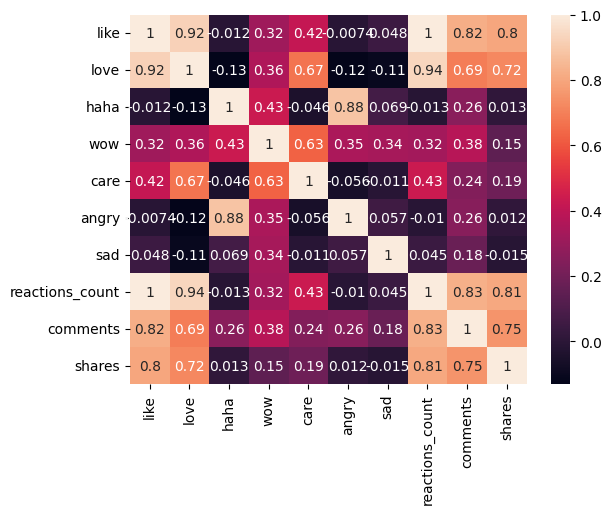

In [72]:
sns.heatmap(df_interactions.corr(),annot=True)
plt.show()

Simple Linear Regression model predicting Reactions Count based on Number of Shares and Comments

Feauture Scaling

In [126]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_interactions)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df_interactions.columns)
print(scaled_df.head())

       like      love      haha       wow      care     angry       sad  \
0  0.000000  0.005759  0.001248  0.000000  0.002482  0.013550  0.000373   
1  0.048556  0.084718  0.009071  0.010703  0.081014  0.000000  0.000373   
2  0.059583  0.004554  0.713715  0.074924  0.008686  0.734417  0.008001   
3  0.186857  0.294380  0.011984  0.074924  0.284169  0.016260  0.000053   
4  0.124425  0.120889  0.006075  0.081040  0.107428  0.043360  0.001120   

   reactions_count  comments    shares  
0         0.000000  0.010844  0.000211  
1         0.049425  0.037736  0.005266  
2         0.063393  0.323011  0.014956  
3         0.187229  0.072275  0.037232  
4         0.112120  0.210180  0.052083  


In [131]:
feature = ['reactions_count', 'like', 'love', 'haha', 'wow', 'care', 'angry', 'sad']
X = df_interactions[feature].values
y = df_interactions['shares'].values

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 8)
(20, 8)
(80,)
(20,)


In [144]:
class LinearRegression:
    def __init__(self, learning_rate=1e-5, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.num_iterations):
            # Predicted values
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            print("Error ", i, ": " , np.sum(y_pred - y) / n_samples)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias       

In [145]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

Error  0 :  -605.9875
Error  1 :  176668553.17322963
Error  2 :  -26805446805923.137
Error  3 :  4.066367282582921e+18
Error  4 :  -6.16864866034974e+23
Error  5 :  9.35779373344109e+28
Error  6 :  -1.419570288066475e+34
Error  7 :  2.1534774757426705e+39
Error  8 :  -3.266809172828971e+44
Error  9 :  4.95572500380996e+49
Error  10 :  -7.51779764721292e+54
Error  11 :  1.1404442623630172e+60
Error  12 :  -1.7300453890760201e+65
Error  13 :  2.6244658744317238e+70
Error  14 :  -3.9812950397418815e+75
Error  15 :  6.03959470301951e+80
Error  16 :  -9.162019848472776e+85
Error  17 :  1.3898715366089351e+91
Error  18 :  -2.108424692615882e+96
Error  19 :  3.198464438863593e+101
Error  20 :  -4.852046555185528e+106
Error  21 :  7.360518218564998e+111
Error  22 :  -1.1165850910463015e+117
Error  23 :  1.693851205207594e+122
Error  24 :  -2.5695595690738486e+127
Error  25 :  3.8980025864844354e+132
Error  26 :  -5.913240676384051e+137
Error  27 :  8.970341738120478e+142
Error  28 :  -1.360794

C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_10856\3001728418.py:23: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * dw


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

K-means Clustering